In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import matplotlib

%matplotlib inline

In [99]:
# color
cmap = plt.get_cmap('cividis')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))


# fontsizes
matplotlib.rc('xtick', labelsize=10) # x tick
matplotlib.rc('ytick', labelsize=10) # y tick
matplotlib.rc('font', size=10) # default text sizes
matplotlib.rc('axes', titlesize=13) # axes title
matplotlib.rc('axes', labelsize=13) # x,y labels
matplotlib.rc('figure', titlesize=30) # figure title 

In [97]:
IMAGE_PATH = 'data/images'
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + '.' + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)    

In [4]:
!sed -i 's/archive.ubuntu.com/ftp.daumkakao.com/g' /etc/apt/sources.list
!apt-get update 
!fc-cache -fv
!apt-get install -y fonts-nanum
!rm -rf ~/.cache/matplotlib/*
plt.rc('font', family='NanumBarunGothic')

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://security.debian.org/debian-security buster/updates InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Reading package lists... Done
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 6 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/X11R6/lib/X11/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfi

### 전부합쳐진 데이터 살펴보기

In [5]:
df = pd.read_csv('data/registration/disabled_numeric.csv')
df.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (3,4,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,통계년월,통계시도명,통계시군구명,장애등급명,장애유형명,등록장애인수,장애등급,장애유형,장애정도
0,201401,서울특별시,종로구,1급,지체,58,NaN,NaN,NaN
1,201401,서울특별시,종로구,1급,시각,189,NaN,NaN,NaN
2,201401,서울특별시,종로구,1급,청각,29,NaN,NaN,NaN
3,201401,서울특별시,종로구,1급,지적,86,NaN,NaN,NaN
4,201401,서울특별시,종로구,1급,뇌병변,154,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039449 entries, 0 to 1039448
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   통계년월    1039449 non-null  int64 
 1   통계시도명   1039449 non-null  object
 2   통계시군구명  1039449 non-null  object
 3   장애등급명   592162 non-null   object
 4   장애유형명   592162 non-null   object
 5   등록장애인수  1039449 non-null  int64 
 6   장애등급    316968 non-null   object
 7   장애유형    447287 non-null   object
 8   장애정도    130319 non-null   object
dtypes: int64(2), object(7)
memory usage: 71.4+ MB


### 년도별로 나눈 데이터 불러오기

In [7]:
input_file = 'data/registration'
aFile = glob.glob(os.path.join(input_file, 'regist*'))
aFile

['data/registration/regist2014.csv',
 'data/registration/regist2015.csv',
 'data/registration/regist2016.csv',
 'data/registration/regist2017.csv',
 'data/registration/regist2018.csv',
 'data/registration/regist2019.csv',
 'data/registration/regist2020.csv',
 'data/registration/regist2021.csv']

In [8]:
dfs = []

for f in aFile:
    data = pd.read_csv(f, engine='python', encoding='utf-8')
    dfs.append(data)
    
dfs[0].head()

,통계년월,통계시도명,통계시군구명,장애등급명,장애유형명,등록장애인수
0,201401,서울특별시,종로구,1급,지체,58
1,201401,서울특별시,종로구,1급,시각,189
2,201401,서울특별시,종로구,1급,청각,29
3,201401,서울특별시,종로구,1급,지적,86
4,201401,서울특별시,종로구,1급,뇌병변,154


### 년도별 등록장애인수 & visualization

In [9]:
sums = []

for i in range(0, len(dfs)-1):
    sums.append(dfs[i]['등록장애인수'].sum())
    print(sums[i])

29938938
29871389
29993517
30339185
30766272
31253265
31522896


In [10]:
avgs = []

for i in range(0, len(dfs)-1):
    avgs.append(dfs[i]['등록장애인수'].mean())
    print(avgs[i])

181.36567014993184
180.73530497286373
181.25599482704442
183.71796657381614
185.98095836834375
264.34516912094324
443.3412936163031


Saving figure 연도별 등록장애인 수 총합


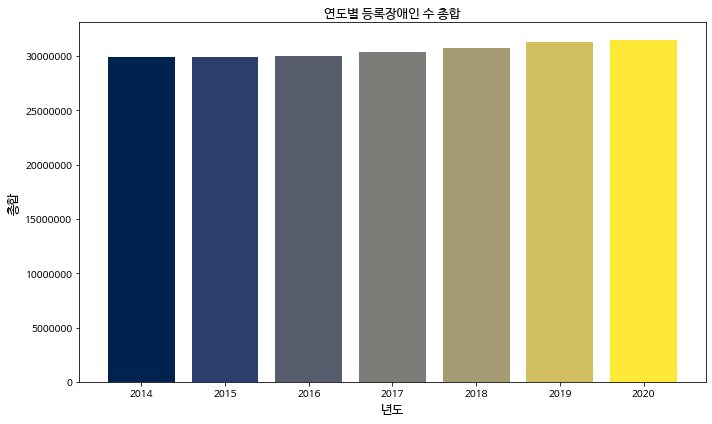

In [100]:
years = ['2014', '2015', '2016','2017','2018', '2019', '2020']

y = np.array([1,2,3,4,5,6,7])

plt.ticklabel_format(style = 'plain')

plt.bar(years, sums, color=cmap(rescale(y)))
plt.title('연도별 등록장애인 수 총합')
plt.xlabel('년도')
plt.ylabel('총합')

save_fig('연도별 등록장애인 수 총합')

Saving figure 연도별 등록장애인 수 평균


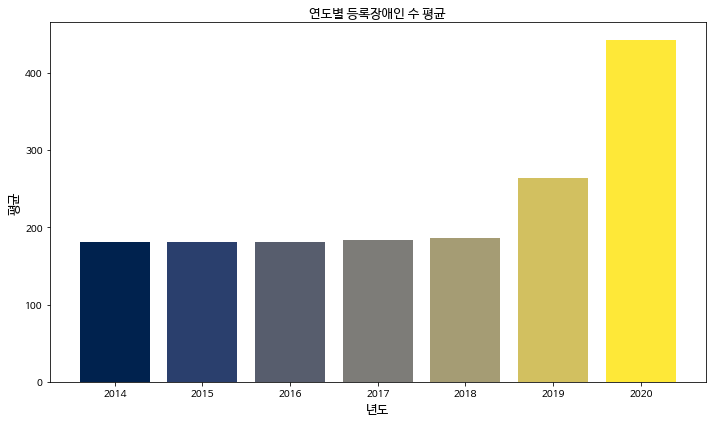

In [101]:
plt.ticklabel_format(style = 'plain')

plt.bar(years, avgs, color=cmap(rescale(y)))
plt.title('연도별 등록장애인 수 평균')
plt.xlabel('년도')
plt.ylabel('평균')

save_fig('연도별 등록장애인 수 평균')

### 장애인 등록자 들의 등급비율 & 시각화

In [13]:
df.head()

,통계년월,통계시도명,통계시군구명,장애등급명,장애유형명,등록장애인수,장애등급,장애유형,장애정도
0,201401,서울특별시,종로구,1급,지체,58,NaN,NaN,NaN
1,201401,서울특별시,종로구,1급,시각,189,NaN,NaN,NaN
2,201401,서울특별시,종로구,1급,청각,29,NaN,NaN,NaN
3,201401,서울특별시,종로구,1급,지적,86,NaN,NaN,NaN
4,201401,서울특별시,종로구,1급,뇌병변,154,NaN,NaN,NaN


In [14]:
df['장애등급명'].value_counts()

3급    133583
2급    128255
1급    109210
4급     92430
5급     88950
6급     39734
Name: 장애등급명, dtype: int64

In [15]:
rates = []
for i in range(0, 6):
    rates.append(df[df['장애등급명']=='{}급'.format(i+1)])

rates[1]

,통계년월,통계시도명,통계시군구명,장애등급명,장애유형명,등록장애인수,장애등급,장애유형,장애정도
10,201401,서울특별시,종로구,2급,지체,173,NaN,NaN,NaN
11,201401,서울특별시,종로구,2급,시각,24,NaN,NaN,NaN
12,201401,서울특별시,종로구,2급,청각,119,NaN,NaN,NaN
13,201401,서울특별시,종로구,2급,언어,3,NaN,NaN,NaN
14,201401,서울특별시,종로구,2급,지적,102,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
592132,201707,제주특별자치도,서귀포시,2급,신장,240,NaN,NaN,NaN
592133,201707,제주특별자치도,서귀포시,2급,심장,4,NaN,NaN,NaN
592134,201707,제주특별자치도,서귀포시,2급,호흡기,25,NaN,NaN,NaN
592135,201707,제주특별자치도,서귀포시,2급,간,1,NaN,NaN,NaN


In [16]:
sums_by_rate = []

for i in range(0,6):
    sums_by_rate.append(rates[i]['등록장애인수'].sum())
    print(sums_by_rate[i])

8523216
14445902
18619089
16050726
22626233
27184014


Saving figure 장애인 등급별 비율


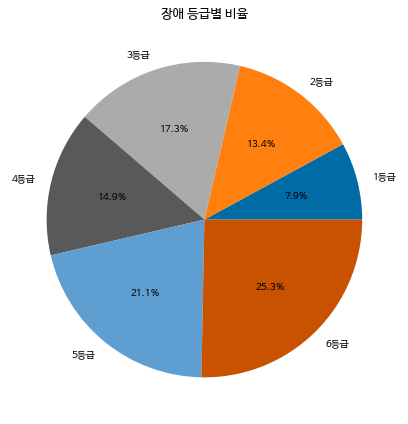

In [102]:
rating = ['1등급', '2등급', '3등급', '4등급', '5등급', '6등급']

plt.pie(sums_by_rate, labels=rating, autopct='%.1f%%')
plt.title('장애 등급별 비율')

save_fig('장애인 등급별 비율')

### 장애유형별 등록자수 

In [18]:
df['장애유형명'].unique()

array(['지체', '시각', '청각', '지적', '뇌병변', '자폐성', '정신', '신장', '호흡기', '간', '언어',
       '심장', '뇌전증', '안면', '장루.요루', nan], dtype=object)

In [19]:
df[df['장애유형명']=='안면']['등록장애인수'].sum()

115426

In [20]:
types = ['지체', '시각', '청각', '지적', '뇌병변', '자폐성', '정신', '신장', '호흡기', '간', '언어',
       '심장', '뇌전증', '안면', '장루.요루']

sum_per_type = []

for i in range(0, len(types)):
    sum_per_type.append(df[df['장애유형명']==types[i]]['등록장애인수'].sum())
    
sum_per_type

[55183863,
 10866560,
 11151778,
 8119476,
 10783171,
 899314,
 4224291,
 3169409,
 521760,
 440908,
 806141,
 258953,
 303151,
 115426,
 604979]

Saving figure 장애 유형별 등록장애인 수


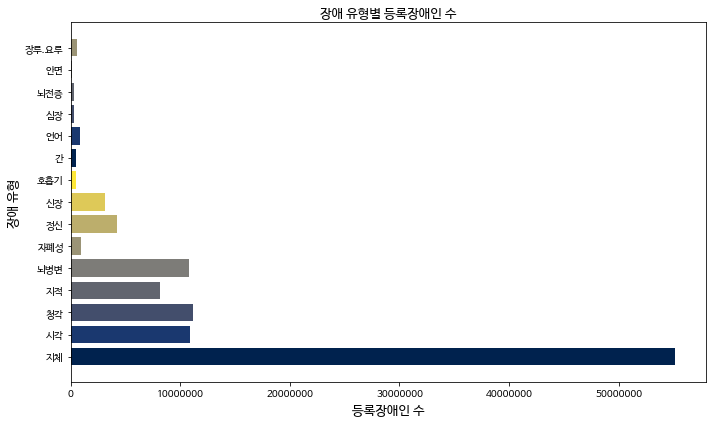

In [103]:
plt.rcParams['figure.figsize'] = (10,6)
plt.ticklabel_format(style = 'plain')

y = np.array([1,2,3,4,5,6,7,8,9])

plt.barh(types, sum_per_type, color=cmap(rescale(y)))

plt.title('장애 유형별 등록장애인 수')
plt.xlabel('등록장애인 수')
plt.ylabel('장애 유형')

save_fig('장애 유형별 등록장애인 수')

plt.show()

### 시도별 등록자수

In [22]:
len(df['통계시도명'].unique())

17

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Saving figure 시도별 등장 빈도수


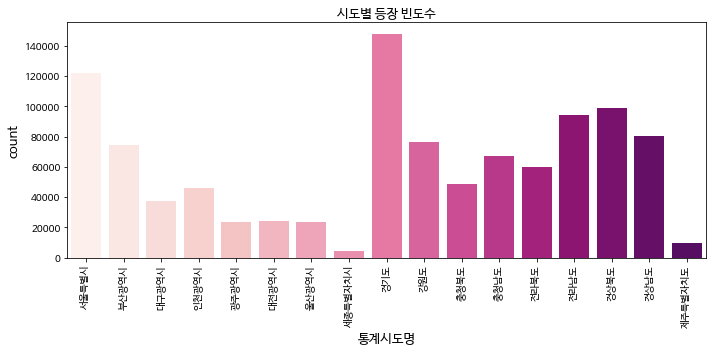

In [104]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('tableau-colorblind10')

sns.countplot(df['통계시도명'], palette='RdPu')
plt.title('시도별 등장 빈도수')
plt.xticks(rotation=90)

save_fig('시도별 등장 빈도수')

plt.show()

In [24]:
df['통계시도명'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [25]:
city = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도']

sum_by_city = []

for i in range(0, len(city)):
    sum_by_city.append(df[df['통계시도명']==city[i]]['등록장애인수'].sum())
    
sum_by_city[0]

34689633

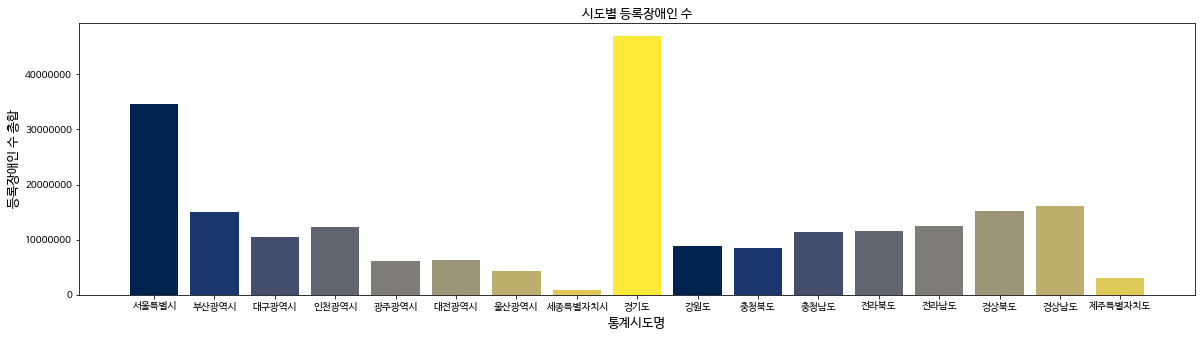

In [105]:
plt.rcParams['figure.figsize'] = (20,5)
plt.ticklabel_format(style = 'plain')

plt.bar(city, sum_by_city, color=cmap(rescale(y)))
plt.title('시도별 등록장애인 수')
plt.xlabel('통계시도명')
plt.ylabel('등록장애인 수 총합')

plt.show()